## Detect Cyber Intrusion Using Machine Learning

### Task 1: Import Libraries and Modules

In [1]:
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.model_selection import train_test_split
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

### Task 2: Preprocess the Dataset

#### Load CSV file into a DataFrame

In [2]:
data_frame = df = pd.read_csv('/usercode/SIMARGL2021.csv')

#### Display the first few rows of the CSV file


In [3]:
data_frame.head()

,BIFLOW_DIRECTION,DIRECTION,DST_TO_SRC_SECOND_BYTES,FIREWALL_EVENT,FIRST_SWITCHED,FLOW_ACTIVE_TIMEOUT,FLOW_DURATION_MICROSECONDS,FLOW_DURATION_MILLISECONDS,FLOW_END_MILLISECONDS,FLOW_END_SEC,...,TCP_WIN_MSS_IN,TCP_WIN_MSS_OUT,TCP_WIN_SCALE_IN,TCP_WIN_SCALE_OUT,SRC_TOS,DST_TOS,L7_PROTO_NAME,SAMPLING_INTERVAL,TOTAL_FLOWS_EXP,LABEL
0,1,0,138,0,1622174400,120,682,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365973,Normal flow
1,1,0,75,0,1622174400,120,579,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365974,Normal flow
2,1,0,40,0,1622174400,120,213,0,1.622170e+12,1622174400,...,0,0,0,0,40,40,Unknown,1,1365976,Normal flow
3,1,0,166,0,1622174400,120,257,0,1.622170e+12,1622174400,...,0,0,0,0,0,0,DNS,1,1365978,Normal flow
4,1,0,",",0,1622174400,120,0,0,1.622170e+12,1622174400,...,0,0,0,0,196,0,ICMP,1,1365979,Normal flow


#### Select the 15 features

In [4]:
selected_columns = [
'DST_TOS', 'SRC_TOS', 'TCP_WIN_SCALE_OUT', 'TCP_WIN_SCALE_IN', 'TCP_FLAGS','TCP_WIN_MAX_OUT', 'PROTOCOL', 'TCP_WIN_MIN_OUT', 'TCP_WIN_MIN_IN','TCP_WIN_MAX_IN', 'LAST_SWITCHED', 'TCP_WIN_MSS_IN', 'TOTAL_FLOWS_EXP','FIRST_SWITCHED', 'FLOW_DURATION_MILLISECONDS', 'LABEL'
]
data_frame = data_frame[selected_columns]
data_frame.head()

,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365973,1622174400,0,Normal flow
1,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365974,1622174400,0,Normal flow
2,40,40,0,0,22,0,6,0,1024,1024,1622174400,0,1365976,1622174400,0,Normal flow
3,0,0,0,0,0,0,17,0,0,0,1622174400,0,1365978,1622174400,0,Normal flow
4,0,196,0,0,0,0,1,0,0,0,1622174400,0,1365979,1622174400,0,Normal flow


#### Remove duplicate rows

### Task 3: Explore the Dataset

#### Display each label and its count via a bar graph


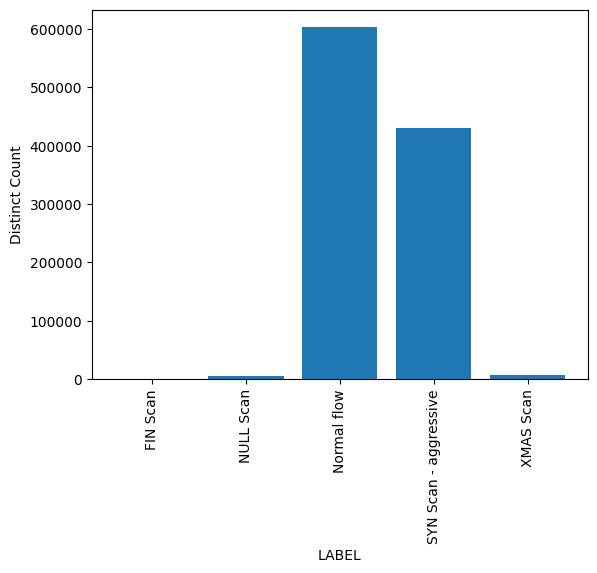

In [5]:
grouped_data = data_frame.groupby('LABEL').size()
fig, ax = plt.subplots(1)
ax.bar(grouped_data.index, grouped_data.values)
ax.set(xlabel='LABEL', ylabel='Distinct Count')
plt.xticks(rotation=90)
plt.show()

#### Plot the distinct counts

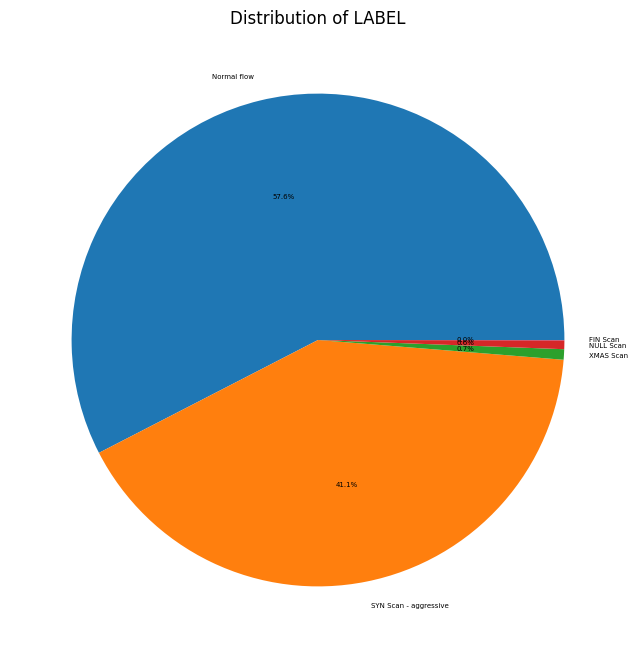

In [6]:
grouped_data = data_frame['LABEL'].value_counts()
fig, ax = plt.subplots(figsize=(8,8))
ax.pie(grouped_data.values, labels=grouped_data.index, autopct='%1.1f%%', textprops={'fontsize': 5})
ax.set_title('Distribution of LABEL')
plt.show()

### Task 4: Standardize and Encode the Data

#### Create a copy of the data

In [7]:
normalized_data = data_frame.copy()
numerical_columns = normalized_data.select_dtypes(include=['float64', 'int64']).columns

#### Extract the numerical columns to be normalized

In [8]:
non_numerical_columns = normalized_data.select_dtypes(exclude=['float64', 'int64']).columns

#### Extract the non-numerical columns to be label encoded

In [9]:
label_encoder = LabelEncoder()
normalized_data[non_numerical_columns] = normalized_data[non_numerical_columns].apply(label_encoder.fit_transform)

#### Standardize the numerical columns

In [10]:
scaler = StandardScaler() 
normalized_data[numerical_columns] = scaler.fit_transform(normalized_data[numerical_columns])

In [11]:
normalized_data.head()



,DST_TOS,SRC_TOS,TCP_WIN_SCALE_OUT,TCP_WIN_SCALE_IN,TCP_FLAGS,TCP_WIN_MAX_OUT,PROTOCOL,TCP_WIN_MIN_OUT,TCP_WIN_MIN_IN,TCP_WIN_MAX_IN,LAST_SWITCHED,TCP_WIN_MSS_IN,TOTAL_FLOWS_EXP,FIRST_SWITCHED,FLOW_DURATION_MILLISECONDS,LABEL
0,-0.211035,-0.286614,-0.299933,-0.3367,-1.112694,-0.292102,1.635989,-0.29163,-0.371247,-0.374966,0.811363,-1.091927,-0.886177,0.811365,-0.196348,2
1,-0.211035,-0.286614,-0.299933,-0.3367,-1.112694,-0.292102,1.635989,-0.29163,-0.371247,-0.374966,0.811363,-1.091927,-0.886176,0.811365,-0.196348,2
2,1.533774,0.911532,-0.299933,-0.3367,0.767547,-0.292102,-0.500927,-0.29163,-0.308694,-0.312855,0.811363,-1.091927,-0.886175,0.811365,-0.196348,2
3,-0.211035,-0.286614,-0.299933,-0.3367,-1.112694,-0.292102,1.635989,-0.29163,-0.371247,-0.374966,0.811363,-1.091927,-0.886174,0.811365,-0.196348,2
4,-0.211035,5.584303,-0.299933,-0.3367,-1.112694,-0.292102,-1.472253,-0.29163,-0.371247,-0.374966,0.811363,-1.091927,-0.886174,0.811365,-0.196348,2


### Task 5: Separate Labels and Split Data into Train and Test Subsets

#### Separate data and labels

In [ ]:
X = normalized_data.drop(columns=['LABEL'], axis=1)
Y = normalized_data['LABEL']

#### Split data into train and test subsets


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Task 6: Train Random Forest

#### Create a random forest classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=30)

#### Measure the training time

In [ ]:
start_time = time.time()
rf_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeRFC = end_time - start_time

### Task 7: Test Random Forest

#### Make predictions on the test set


In [ ]:
y_pred = rf_classifier.predict(X_test)

#### Calculate and print the accuracy, F1 score, precision, and recall

In [ ]:
accuracyRFC = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, "weighted")
precision = precision_score(y_test, y_pred, "weighted")
recall = recall_score(y_test, y_pred, "weighted")
print(accuracyRFC)
print(f1)
print(precision)
print(recall)

### Task 8: Train Decision Tree

#### Create a DecisionTreeClassifier with criterion='entropy' and max_depth=4

In [ ]:
dt_classifier = DecisionTreeClassifier(criterion="entropy", max_depth=4)

#### Measure the training time


In [ ]:
start_time = time.time()
dt_classifier.fit(X_train)
end_time = time.time()
training_timeDT = end_time - start_time
print(training_timeDT)

### Task 9: Test Decision Tree

#### Make predictions on the test set

In [ ]:
y_pred = dt_classifier.predict(X_test)

#### Calculate and print the accuracy, F1 score, precision, and recall

In [ ]:
accuracyDT = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, "weighted")
precision = precision_score(y_test, pred, "weighted")
recall = recall_score(y_test, y_pred, "weighted")

print("Accuracy:", accuracyDT)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)

### Task 10: Train Naive Bayes

#### Create a Gaussian Naive Bayes classifier

In [ ]:
nb_classifier = GaussianNB()

#### Measure the training time

In [ ]:
start_time = time.time()
nb_classifier.fit(X_train, y_train)
end_time = time.time()
training_timeNB = end_time - start_time
print("Training Time:" training_timeNB)

### Task 11: Test Naive Bayes

#### Make predictions on the test dataset

#### Calculate and print the accuracy, F1 sore, precision, and recall

### Task 12: Compare the Accuracy and Training Times

#### Accuracy scores and training time of the three algorithms

#### Names of the algorithms

#### Create a bar plot for accuracy

#### Create a bar plot for training time